In [1]:
from utils import * 

In [2]:
import os
os.chdir("../../scVI/")
os.getcwd()

import pickle
import numpy as np
import pandas as pd

In [3]:
import torch

In [4]:
from umap import UMAP

In [5]:
from sklearn.cluster import SpectralClustering

In [6]:
from scvi.inference import UnsupervisedTrainer
from scvi.models import VAE
save_path = '../CSF/Notebooks/'

In [7]:
# with open(save_path + 'dataset/all_datasets.pkl', 'rb') as f:
#     gene_dataset = pickle.load(f)


In [8]:
%matplotlib inline

In [9]:
# samplename = 'allgenes'
# vae = VAE(gene_dataset.nb_genes, n_batch=gene_dataset.n_batches,
#       n_hidden=128, n_latent=10, n_layers=2, dispersion='gene')
# trainer = UnsupervisedTrainer(vae, gene_dataset, train_size=1.0)

# if os.path.isfile(save_path+'models/vae.%s.pkl' % samplename ):
#     trainer.model.load_state_dict(torch.load(save_path+'models/vae.%s.pkl' % samplename))
#     trainer.model.eval()
# else:
#     trainer.train(n_epochs=100)
#     torch.save(trainer.model.state_dict(), save_path+'models/vae.%s.pkl'  % samplename)
    
# full = trainer.create_posterior(trainer.model, gene_dataset, indices=np.arange(len(gene_dataset)))


In [10]:
# with open(save_path + 'posterior/all_datasets.vae.full.pkl', 'wb') as f:
#     pickle.dump(full,f)

In [15]:
# with open(save_path + 'posterior/CD4.vae.full.pkl', 'rb') as f:
#     full = pickle.load(f)

with open(save_path + 'posterior/all_datasets.vae.full.pkl', 'rb') as f:
    full = pickle.load(f)
    
latent, batch_indices, labels = full.sequential().get_latent()
# latent_u = UMAP(spread=2).fit_transform(latent)
# np.save(save_path + 'UMAP/CD4only.umap.npy',latent_u)
# latent_u = np.load(save_path + 'UMAP/CD4only.umap.npy')
latent_u = np.load(save_path + 'UMAP/all_dataset.umap.npy')

In [17]:
# from numpy import savetxt
# savetxt('../CSF/RFiles/latent.csv', latent, delimiter=',', fmt='%f')
# savetxt('../CSF/RFiles/latent_u.csv', latent_u, delimiter=',', fmt='%f')

In [18]:
celllabels = np.load(save_path + 'clusterings/celllabels.npy')
isCD4 = celllabels=='CD4'

# clusters = louvain_clusters(latent[isCD4,:], k=30)
# np.save(save_path + 'clusterings/CD4.clusters.npy', clusters)

In [13]:
# clusters = louvain_clusters(latent, k=30)
# np.save(save_path + 'clusterings/CD4only.clusters.npy', clusters)

In [14]:
clusters = np.load(save_path + 'clusterings/CD4.clusters.npy')

In [19]:
tissue=np.concatenate([np.repeat('CSF',8),np.repeat('PBMC',10)])
states=np.asarray(['MS','MS','MS','MS','control','control','control','control',
                   'MS','MS','MS','MS','MS','control','control','control','control','control'])


batchid = batch_indices.ravel().astype('int')[isCD4]
# batchid = batch_indices.ravel().astype('int')
isMS = np.asarray([states[i]=='MS' for i in batchid])
isCSF = np.asarray([tissue[i]=='CSF' for i in batchid])

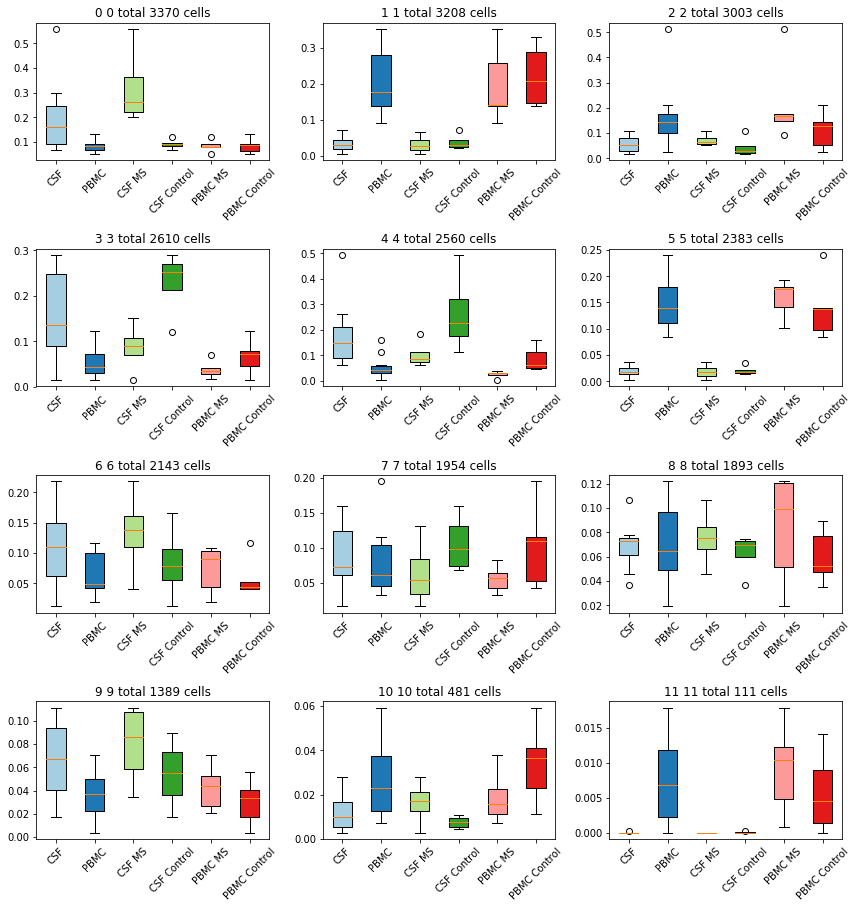

In [20]:
ClusterProp(clusters,batchid,np.unique(clusters).astype('str'),tissue,states,np.unique(clusters).astype('str'))